 # 1.基于业务知识
如果你的数据具有明显的周期性（如每天、每周或季节性变化），可以根据周期长度选择窗口大小。

例如，如果数据每小时记录一次，且每天有明显的周期性，可以选择窗口大小为 24（过去 24 小时）。

如果数据每天记录一次，且每周有明显的周期性，可以选择窗口大小为 7（过去 7 天）。

# 2. 基于自相关函数（ACF）
自相关函数（ACF）可以帮助分析时间序列的滞后相关性。

通过观察 ACF 图，找到相关性显著的时间滞后点，作为滑动窗口大小的参考。

C:\Users\11712\.conda\envs\grib_\lib\site-packages\matplotlib\axes\_base.py:2503: UserWarning: Warning: converting a masked element to nan.
  xys = np.asarray(xys)
C:\Users\11712\.conda\envs\grib_\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 33258 (\N{CJK UNIFIED IDEOGRAPH-81EA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\11712\.conda\envs\grib_\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 30456 (\N{CJK UNIFIED IDEOGRAPH-76F8}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\11712\.conda\envs\grib_\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 20851 (\N{CJK UNIFIED IDEOGRAPH-5173}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\11712\.conda\envs\grib_\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 31995 (\N{CJK UNIFIED IDEOGRAPH-7CFB}) missing from current font.
  fig.canvas.print_figure(bytes_io, **

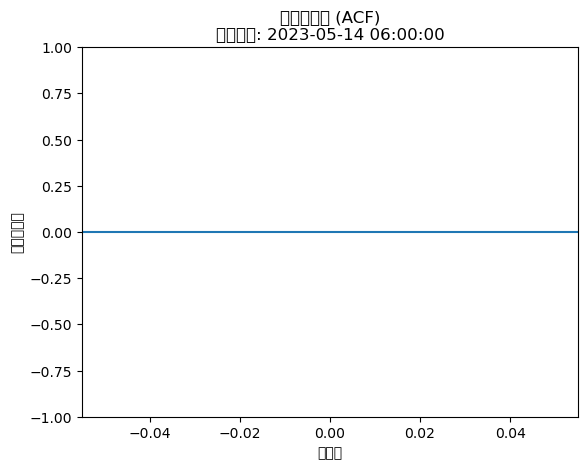

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf

# 从CSV文件中读取数据
file_path = r'E:\我的桌面\03.01之前风力发电代码\1ECMWF预报数据和11风场观测数据训练模型\ID01.csv'
data = pd.read_csv(file_path)

# 将时间列 'date_time' 转换为 datetime 类型，并设置为索引
data['date_time'] = pd.to_datetime(data['date_time'])
data.set_index('date_time', inplace=True)

# 手动指定开始时间
manual_start_time = pd.Timestamp('2023-05-14 06:00:00')

# 确保数据从指定的开始时间开始
# 如果数据的起始时间早于手动指定的开始时间，则截取从指定时间开始的数据
if data.index[0] < manual_start_time:
    data = data[manual_start_time:]

# 绘制自相关函数 (ACF)
plot_acf(data['wind_obs'], lags=50)  # 分析前 50 个时间步的自相关性
plt.title(f'自相关函数 (ACF)\n开始时间: {manual_start_time.strftime("%Y-%m-%d %H:%M:%S")}')
plt.xlabel('滞后期')
plt.ylabel('自相关系数')
plt.show()

# 3. 基于滑动窗口特征的稳定性
计算不同窗口大小下的滑动窗口特征（如均值、标准差），观察其稳定性。

选择一个窗口大小，使得滑动窗口特征既能捕捉到趋势变化，又不会过于波动。

C:\Users\11712\.conda\envs\grib_\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 19981 (\N{CJK UNIFIED IDEOGRAPH-4E0D}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\11712\.conda\envs\grib_\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 21516 (\N{CJK UNIFIED IDEOGRAPH-540C}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\11712\.conda\envs\grib_\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 31383 (\N{CJK UNIFIED IDEOGRAPH-7A97}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\11712\.conda\envs\grib_\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 21475 (\N{CJK UNIFIED IDEOGRAPH-53E3}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\11712\.conda\envs\grib_\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 22823 (\N{CJK UNIFIED IDEOGRAPH-5927}) missing from curren

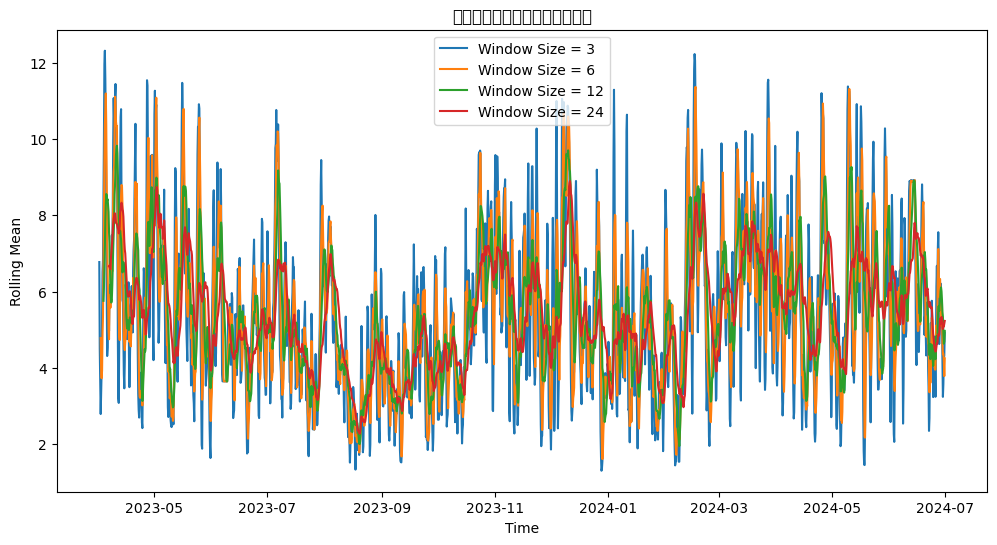

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# 读取CSV文件
file_path = r'E:\我的桌面\03.01之前风力发电代码\1ECMWF预报数据和11风场观测数据训练模型\ID01-6.csv'
data = pd.read_csv(file_path)

# 确保date_time列是时间格式
data['date_time'] = pd.to_datetime(data['date_time'])

# 确保数据按时间排序
data.sort_values(by='date_time', inplace=True)

# 测试不同的窗口大小
window_sizes = [3, 6, 12, 24]

# 设置图表大小
plt.figure(figsize=(12, 6))

# 计算不同窗口大小下的滑动窗口均值并绘制图表
for window_size in window_sizes:
    data[f'rolling_mean_{window_size}'] = data['wind_obs'].rolling(window=window_size).mean()
    plt.plot(data['date_time'], data[f'rolling_mean_{window_size}'], label=f'Window Size = {window_size}')

# 设置图表标题和坐标轴标签
plt.xlabel('Time')
plt.ylabel('Rolling Mean')
plt.title('不同窗口大小下的滑动窗口均值')
plt.legend()

# 显示图表
plt.show()

# 4. 基于模型性能
通过实验不同窗口大小，选择使模型性能最优的窗口大小。

可以使用交叉验证或网格搜索来评估不同窗口大小对模型性能的影响。

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

# 读取CSV文件
file_path = r'E:\我的桌面\03.01之前风力发电代码\1ECMWF预报数据和11风场观测数据训练模型\ID01.csv'
data = pd.read_csv(file_path)

# 确保date_time列是时间格式
data['date_time'] = pd.to_datetime(data['date_time'])

# 筛选指定时间范围内的数据
start_time = '2023-07-01 00:00:00'
end_time = '2024-06-30 18:00:00'
data = data[(data['date_time'] >= start_time) & (data['date_time'] <= end_time)]

# 确保数据按时间排序
data.sort_values(by='date_time', inplace=True)

# 3. 数据预处理
# 提取时间特征
data['hour'] = data['date_time'].dt.hour
data['day'] = data['date_time'].dt.day
data['month'] = data['date_time'].dt.month
data['year'] = data['date_time'].dt.year

# 提取季节特征
def get_season(month):
    if month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    elif month in [9, 10, 11]:
        return 'Autumn'
    else:
        return 'Winter'

data['season'] = data['month'].apply(get_season)
season_mapping = {'Spring': 1, 'Summer': 2, 'Autumn': 3, 'Winter': 4}
data['season'] = data['season'].map(season_mapping)

# 加入滞后一个特征（lag_1）
data['wind_obs_lag_1'] = data['wind_obs'].shift(1)  # 滞后一个时间步
data.dropna(inplace=True)  # 删除因滞后特征引入的缺失值

# 定义窗口大小范围
window_sizes = [2,3,4, 8, 12, 16, 20,24]

# 评估不同窗口大小对模型性能的影响
results = []
for window_size in window_sizes:
    # 计算滑动窗口特征
    data['rolling_mean'] = data['wind_obs'].rolling(window=window_size).mean()
    data['rolling_std'] = data['wind_obs'].rolling(window=window_size).std()
    data.dropna(inplace=True)  # 删除因滑动窗口特征引入的缺失值

    # 定义特征和目标变量
    X = data[['ec', 'hour', 'day', 'month', 'year', 'season', 'wind_obs_lag_1', 'rolling_mean', 'rolling_std']]
    y = data['wind_obs']

    # 划分数据集
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

    # 标准化
    scaler_X = MinMaxScaler()
    scaler_y = MinMaxScaler()
    X_train = scaler_X.fit_transform(X_train)
    X_test = scaler_X.transform(X_test)
    y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1)).flatten()
    y_test_scaled = scaler_y.transform(y_test.values.reshape(-1, 1)).flatten()

    # 训练模型
    rf = RandomForestRegressor(random_state=42)
    rf.fit(X_train, y_train_scaled)

    # 评估模型
    y_pred_scaled = rf.predict(X_test)
    y_pred = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1)).flatten()
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    results.append((window_size, rmse))

# 输出结果
for window_size, rmse in results:
    print(f"Window Size: {window_size}, RMSE: {rmse:.4f}")

Window Size: 2, RMSE: 0.2624
Window Size: 3, RMSE: 1.3592
Window Size: 4, RMSE: 1.5637
Window Size: 8, RMSE: 2.0077
Window Size: 12, RMSE: 1.9585
Window Size: 16, RMSE: 2.1566
Window Size: 20, RMSE: 2.0467
Window Size: 24, RMSE: 2.2928


C:\Users\11712\.conda\envs\grib_\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 28369 (\N{CJK UNIFIED IDEOGRAPH-6ED1}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\11712\.conda\envs\grib_\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 21160 (\N{CJK UNIFIED IDEOGRAPH-52A8}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\11712\.conda\envs\grib_\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 31383 (\N{CJK UNIFIED IDEOGRAPH-7A97}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\11712\.conda\envs\grib_\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 21475 (\N{CJK UNIFIED IDEOGRAPH-53E3}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\11712\.conda\envs\grib_\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 22343 (\N{CJK UNIFIED IDEOGRAPH-5747}) missing from curren

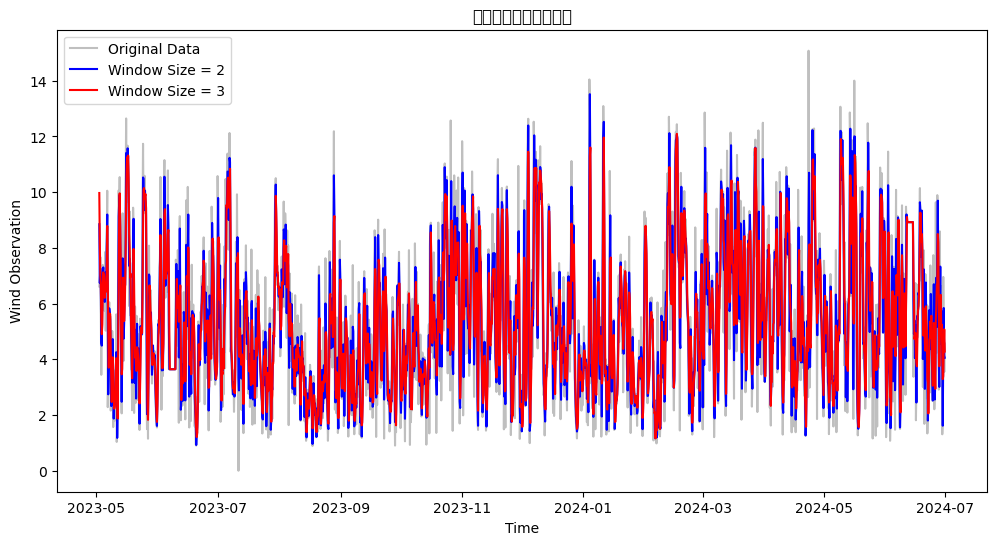

In [19]:
# 比较窗口大小 2 和 3 的滑动窗口均值曲线
import pandas as pd
import matplotlib.pyplot as plt

# 读取CSV文件
file_path = r'E:\我的桌面\03.01之前风力发电代码\1ECMWF预报数据和11风场观测数据训练模型\ID01.csv'
data = pd.read_csv(file_path)

# 确保date_time列是时间格式
data['date_time'] = pd.to_datetime(data['date_time'])

# 筛选指定时间范围内的数据
start_time = '2023-05-02 00:00:00'
end_time = '2024-06-30 23:59:59'
data = data[(data['date_time'] >= start_time) & (data['date_time'] <= end_time)]

# 确保数据按时间排序
data.sort_values(by='date_time', inplace=True)

# 计算窗口大小 2 和 3 的滑动窗口均值
data['rolling_mean_2'] = data['wind_obs'].rolling(window=2).mean()
data['rolling_mean_3'] = data['wind_obs'].rolling(window=3).mean()

# 删除因滑动窗口特征引入的缺失值
data.dropna(inplace=True)

# 绘制原始数据和滑动窗口均值曲线
plt.figure(figsize=(12, 6))
plt.plot(data['date_time'], data['wind_obs'], label='Original Data', color='gray', alpha=0.5)
plt.plot(data['date_time'], data['rolling_mean_2'], label='Window Size = 2', color='blue')
plt.plot(data['date_time'], data['rolling_mean_3'], label='Window Size = 3', color='red')

# 设置图表标题和坐标轴标签
plt.xlabel('Time')
plt.ylabel('Wind Observation')
plt.title('滑动窗口均值曲线对比')
plt.legend()
plt.show()